Filters are now off.
Laser is turned off.
Calibration in progress ...



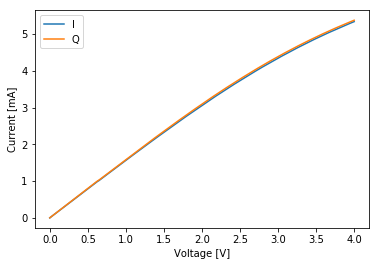

Calibration finished!

Laser is turned on. Settling ...


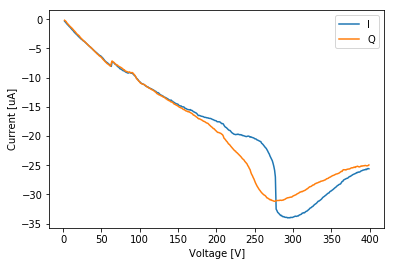

Autocalibration complete.
(296, 276)


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from Instruments.Keithley_2612B import Keithley_2612B
from IQ import IQ
from algo import IQ_FBL, load_IQdat, batch_IQdat
from Instruments.CoBriteDX1 import CoBriteDX1
%matplotlib inline

# Initialize IQ modulator
IQmod = IQ(Keithley_2612B(0, 26, 'a'), Keithley_2612B(0, 26, 'b'))

# Connect to the CoBrite DX1 laser
laser = CoBriteDX1(13)
laser.connect()
laser.set_power(18)
laser.set_wavelength(1546.5)

# Set the voltage range resolution
IQmod.set_voltage(np.linspace(0,4,400).tolist())

# Calibration
Imin, Qmin = IQmod.autocalibrate(laser)
print(Imin, Qmin)

In [18]:
%matplotlib qt
# Running the feedback loop
IQ_FBL(IQmod, 275, 300, 2,2, 1000, filter=False, filtertype="repeat average", count=10, I_on = True, Q_on = True)

In [13]:
%matplotlib qt
load_IQdat("IQ_2019-01-16@11_46_27")

In [19]:
batch_IQdat(os.getcwd())

In [144]:
laser.laser_off()

Laser is turned off.


In [5]:
laser.set_power(18)

In [11]:
laser.set_wavelength(1547)

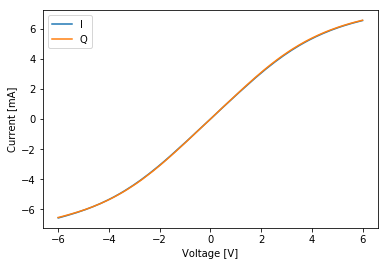

In [4]:
# Measuring the IVcurve of the 2 rings and saving it
IQmod.set_voltage(np.linspace(-6,6,1200).tolist())
IQmod.I.SMU.output_on()
IQmod.Q.SMU.output_on()
V, V, i_I, i_Q = IQmod.sweep(IQmod.V)

In [143]:
# Checking the influence of the filter on the time of measurements
import time

DC=Keithley_2612B(0, 26, 'a')
DC.connect()
DC.output_on()

t = []
I=[]
# do it several times
for i in range(1000):
    start = time.time()

    DC.source_voltage(2.1234)

    end = time.time()
    t.append(end-start)
    
print(np.mean(t)*1000)
print(np.std(t)*1000)

1.2730000019073486
0.4455056792604179


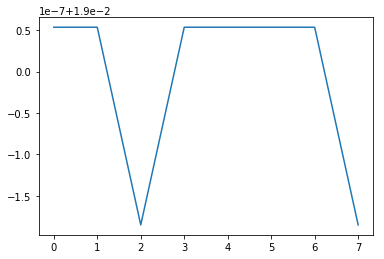

In [78]:
plt.plot(range(8),t[2:])
#plt.plot(range(9),I)
plt.show()

In [120]:
# Time in millisecond
print(np.mean(t)*1000)
print(np.std(t)*1000)

19.092700004577637
1.5914480258315344


In [134]:
# Checking the influence of the filter on the time of measurements
import time

DC=Keithley_2612B(0, 26, 'a')
DC.connect()
DC.output_on()

N=100
t = []
I=[]
# do it several times
start = time.time()
for i in range(N):
    DC.source_voltage(2)
end = time.time()
    
print((end-start)/N*1000)

1.2099981308


In [100]:
DC.measure_current()

[0.00530374]

In [126]:
1/1e6

1e-06